In [1]:
import matplotlib
#matplotlib.use('TKagg')
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
import os
import pandas as pd
import json 
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def json_load(filename):
   with open(filename) as f_in:
       return(json.load(f_in)["mean"]["point_estimate"])

In [3]:
def load_files(dirname):
    folders = os.listdir(dirname)
    #print(folders)
    csv_files = list(map(lambda name: os.path.join(os.path.join(dirname, name),'new/raw.csv'), folders))

    #print(csv_files)


    df_from_each_file = (pd.read_csv(f, sep=',') for f in csv_files)
    #print(list(df_from_each_file))
    df_from_each_file = (f.head(1) for f in df_from_each_file)
    #print(list(df_from_each_file))
    return df_from_each_file
dirname = './benchmarks_schedulers/tokio_seq'

df_from_each_file = list(load_files(dirname)) 
 

In [4]:
df_merged   = pd.concat(df_from_each_file, ignore_index=True)


del df_merged["group"]
del df_merged["throughput_type"]
del df_merged["sample_measured_value"]
del df_merged["unit"]
del df_merged["iteration_count"]


In [5]:
folders = df_merged['value']

df_merged["time"] = list(map(lambda name: json_load(os.path.join(os.path.join(dirname, name),'new/estimates.json')), folders))





In [6]:

time = df_merged['time']
value = df_merged['value']

In [7]:
def size_calculation(value):
    element_size = int(value.split("-")[0])
    vector_size = int(value.split("-")[1])
    matrixs_size =  (((32 * element_size * element_size) * 3) * 2) * vector_size
    #normal_elements_size = ((6 * 32 * 1000) + (2 * 32 * 1000) + (6 * 32)) * vector_size
   
    return matrixs_size /8

In [8]:
#df_merged["throughput"] = list(map(lambda ab: float(ab[0]/ab[1]) ,list(zip(throughput_num, time))))
#df_merged['size'] = list(map(lambda value: value/(1024**2), throughput_num))
#df_merged['time'] = list(map(lambda value: value/1000000, time))
#df_merged['element_size'] = list(map(lambda size:  int(size.split("-")[0]),value))
#df_merged['vector_size'] = list(map(lambda size: int(size.split("-")[1]),value))



del df_merged["throughput_num"]
df_merged['element_size'] = list(map(lambda size:  int(size.split("-")[0]),value))
df_merged['vector_size'] = list(map(lambda size: int(size.split("-")[1]),value))
df_merged["throughput_num"] = list(map(lambda v: size_calculation(v), value))
df_merged['time'] = list(map(lambda value: value/1000000, time))
df_merged["throughput"] = list(map(lambda ab: float(ab[0]/ab[1]) ,list(zip(df_merged["throughput_num"], df_merged['time']))))
df_merged['size'] = list(map(lambda value: value/(1024**2), df_merged["throughput_num"]))




In [9]:
a = df_merged.sort_values(by=["size"], ascending=False)
b = df_merged.sort_values(by=["time"], ascending=True)
#a.to_csv( "merged.csv")
#b.to_csv( "merged2.csv")


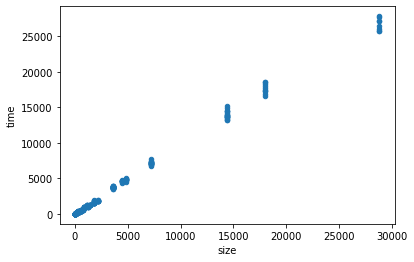

In [10]:

a.plot(x='size', y='time', kind = 'scatter')
plt.show()

<AxesSubplot:xlabel='size'>

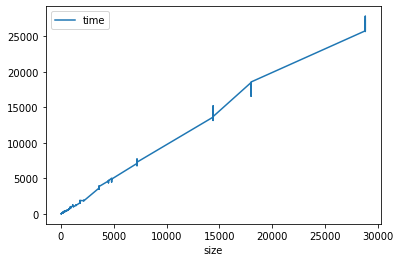

In [11]:
a.plot(x='size', y="time")

<AxesSubplot:xlabel='size', ylabel='time'>

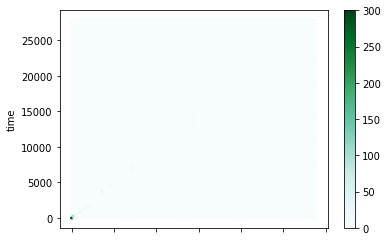

In [12]:
a.plot(x='size', y="time", kind='hexbin')

<AxesSubplot:xlabel='time', ylabel='size'>

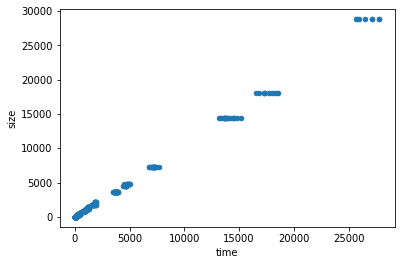

In [13]:
a.plot(x='time', y='size', kind = 'scatter')

<AxesSubplot:xlabel='time'>

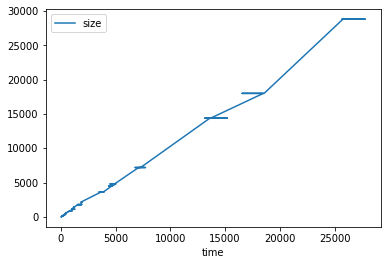

In [14]:
a.plot(x='time', y='size')


In [15]:
a

,function,value,time,element_size,vector_size,throughput_num,throughput,size
212,tokio_seq,512-4800-72,27188.549763,512,4800,3.019899e+10,1.110725e+06,28800.00000
536,tokio_seq,512-4800-60,25967.233415,512,4800,3.019899e+10,1.162965e+06,28800.00000
238,tokio_seq,512-4800-48,25672.274002,512,4800,3.019899e+10,1.176327e+06,28800.00000
24,tokio_seq,512-4800-6,26477.404656,512,4800,3.019899e+10,1.140557e+06,28800.00000
268,tokio_seq,512-4800-24,27755.850332,512,4800,3.019899e+10,1.088022e+06,28800.00000
...,...,...,...,...,...,...,...,...
294,tokio_seq,32-12-24,2.793098,32,12,2.949120e+05,1.055860e+05,0.28125
291,tokio_seq,32-12-36,4.268783,32,12,2.949120e+05,6.908573e+04,0.28125
278,tokio_seq,32-12-2,0.986536,32,12,2.949120e+05,2.989370e+05,0.28125
151,tokio_seq,32-12-12,1.622375,32,12,2.949120e+05,1.817780e+05,0.28125


In [16]:
b.loc[b['time']  > 500 ]

,function,value,time,element_size,vector_size,throughput_num,throughput,size
347,tokio_seq,512-96-72,503.434483,512,96,6.039798e+08,1.199719e+06,576.0
334,tokio_seq,512-120-3,599.829268,512,120,7.549747e+08,1.258649e+06,720.0
626,tokio_seq,512-120-12,612.094396,512,120,7.549747e+08,1.233429e+06,720.0
531,tokio_seq,512-120-84,613.255789,512,120,7.549747e+08,1.231093e+06,720.0
35,tokio_seq,512-120-2,613.981982,512,120,7.549747e+08,1.229637e+06,720.0
...,...,...,...,...,...,...,...,...
24,tokio_seq,512-4800-6,26477.404656,512,4800,3.019899e+10,1.140557e+06,28800.0
288,tokio_seq,512-4800-36,27107.175249,512,4800,3.019899e+10,1.114059e+06,28800.0
212,tokio_seq,512-4800-72,27188.549763,512,4800,3.019899e+10,1.110725e+06,28800.0
268,tokio_seq,512-4800-24,27755.850332,512,4800,3.019899e+10,1.088022e+06,28800.0


In [17]:
b

,function,value,time,element_size,vector_size,throughput_num,throughput,size
278,tokio_seq,32-12-2,0.986536,32,12,2.949120e+05,2.989370e+05,0.28125
333,tokio_seq,32-12-3,1.003936,32,12,2.949120e+05,2.937557e+05,0.28125
513,tokio_seq,32-12-6,1.234571,32,12,2.949120e+05,2.388782e+05,0.28125
374,tokio_seq,32-24-3,1.493594,32,24,5.898240e+05,3.949026e+05,0.56250
526,tokio_seq,32-24-2,1.528066,32,24,5.898240e+05,3.859937e+05,0.56250
...,...,...,...,...,...,...,...,...
24,tokio_seq,512-4800-6,26477.404656,512,4800,3.019899e+10,1.140557e+06,28800.00000
288,tokio_seq,512-4800-36,27107.175249,512,4800,3.019899e+10,1.114059e+06,28800.00000
212,tokio_seq,512-4800-72,27188.549763,512,4800,3.019899e+10,1.110725e+06,28800.00000
268,tokio_seq,512-4800-24,27755.850332,512,4800,3.019899e+10,1.088022e+06,28800.00000


<AxesSubplot:xlabel='time'>

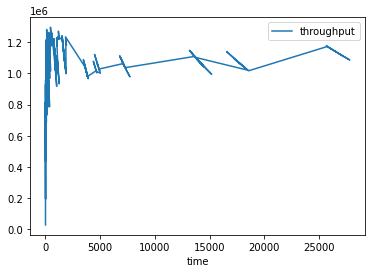

In [18]:
a.plot(x='time', y='throughput')


<AxesSubplot:xlabel='size'>

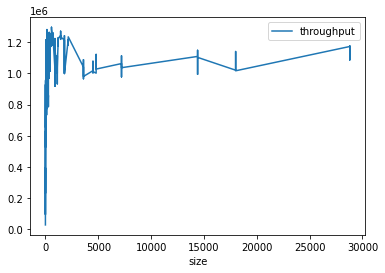

In [19]:
a.plot(x='size', y='throughput')


<AxesSubplot:xlabel='vector_size'>

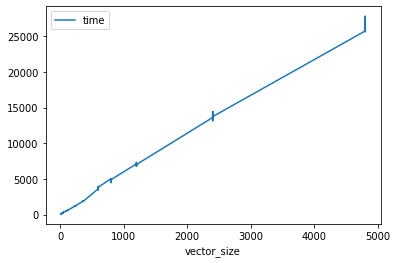

In [20]:
a[a.value.str.contains(r"^512")].plot(x='vector_size', y='time')


<AxesSubplot:xlabel='element_size'>

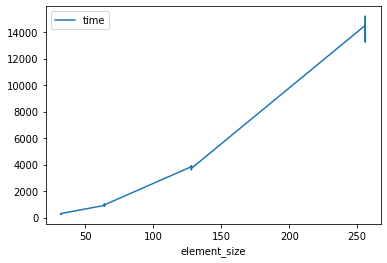

In [21]:
a[a.value.str.contains(r".*-9600")].plot(x='element_size', y='time')


<AxesSubplot:xlabel='vector_size'>

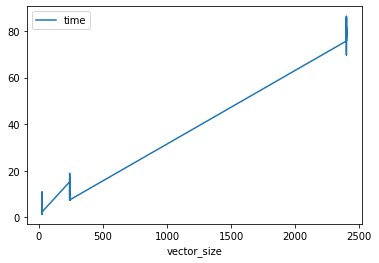

In [22]:
a[a.value.str.contains(r"^32-24")].plot(x='vector_size', y='time')


<AxesSubplot:xlabel='element_size'>

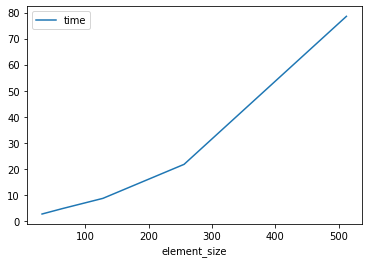

In [23]:
a[a.value.str.contains(r".*-12-24$")].plot(x='element_size', y='time')


In [24]:
a[a.value.str.contains(r".*-800-23$")]

,function,value,time,element_size,vector_size,throughput_num,throughput,size


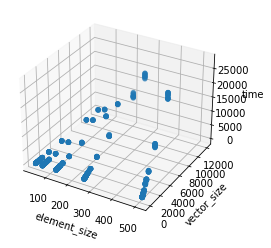

In [25]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(a['element_size'], a['vector_size'],a['time'])
threedee.set_xlabel('element_size')
threedee.set_ylabel('vector_size')
threedee.set_zlabel('time')
plt.show()

No handles with labels found to put in legend.


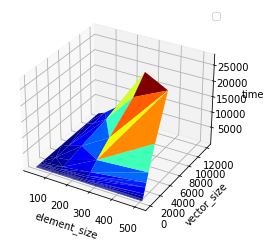

In [26]:
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel("element_size")
ax.set_ylabel("vector_size")
ax.set_zlabel("time")
ax.legend()

ax.plot_trisurf(a['element_size'], a['vector_size'],a['time'], cmap=plt.cm.jet, linewidth=0.2)
plt.show()

No handles with labels found to put in legend.


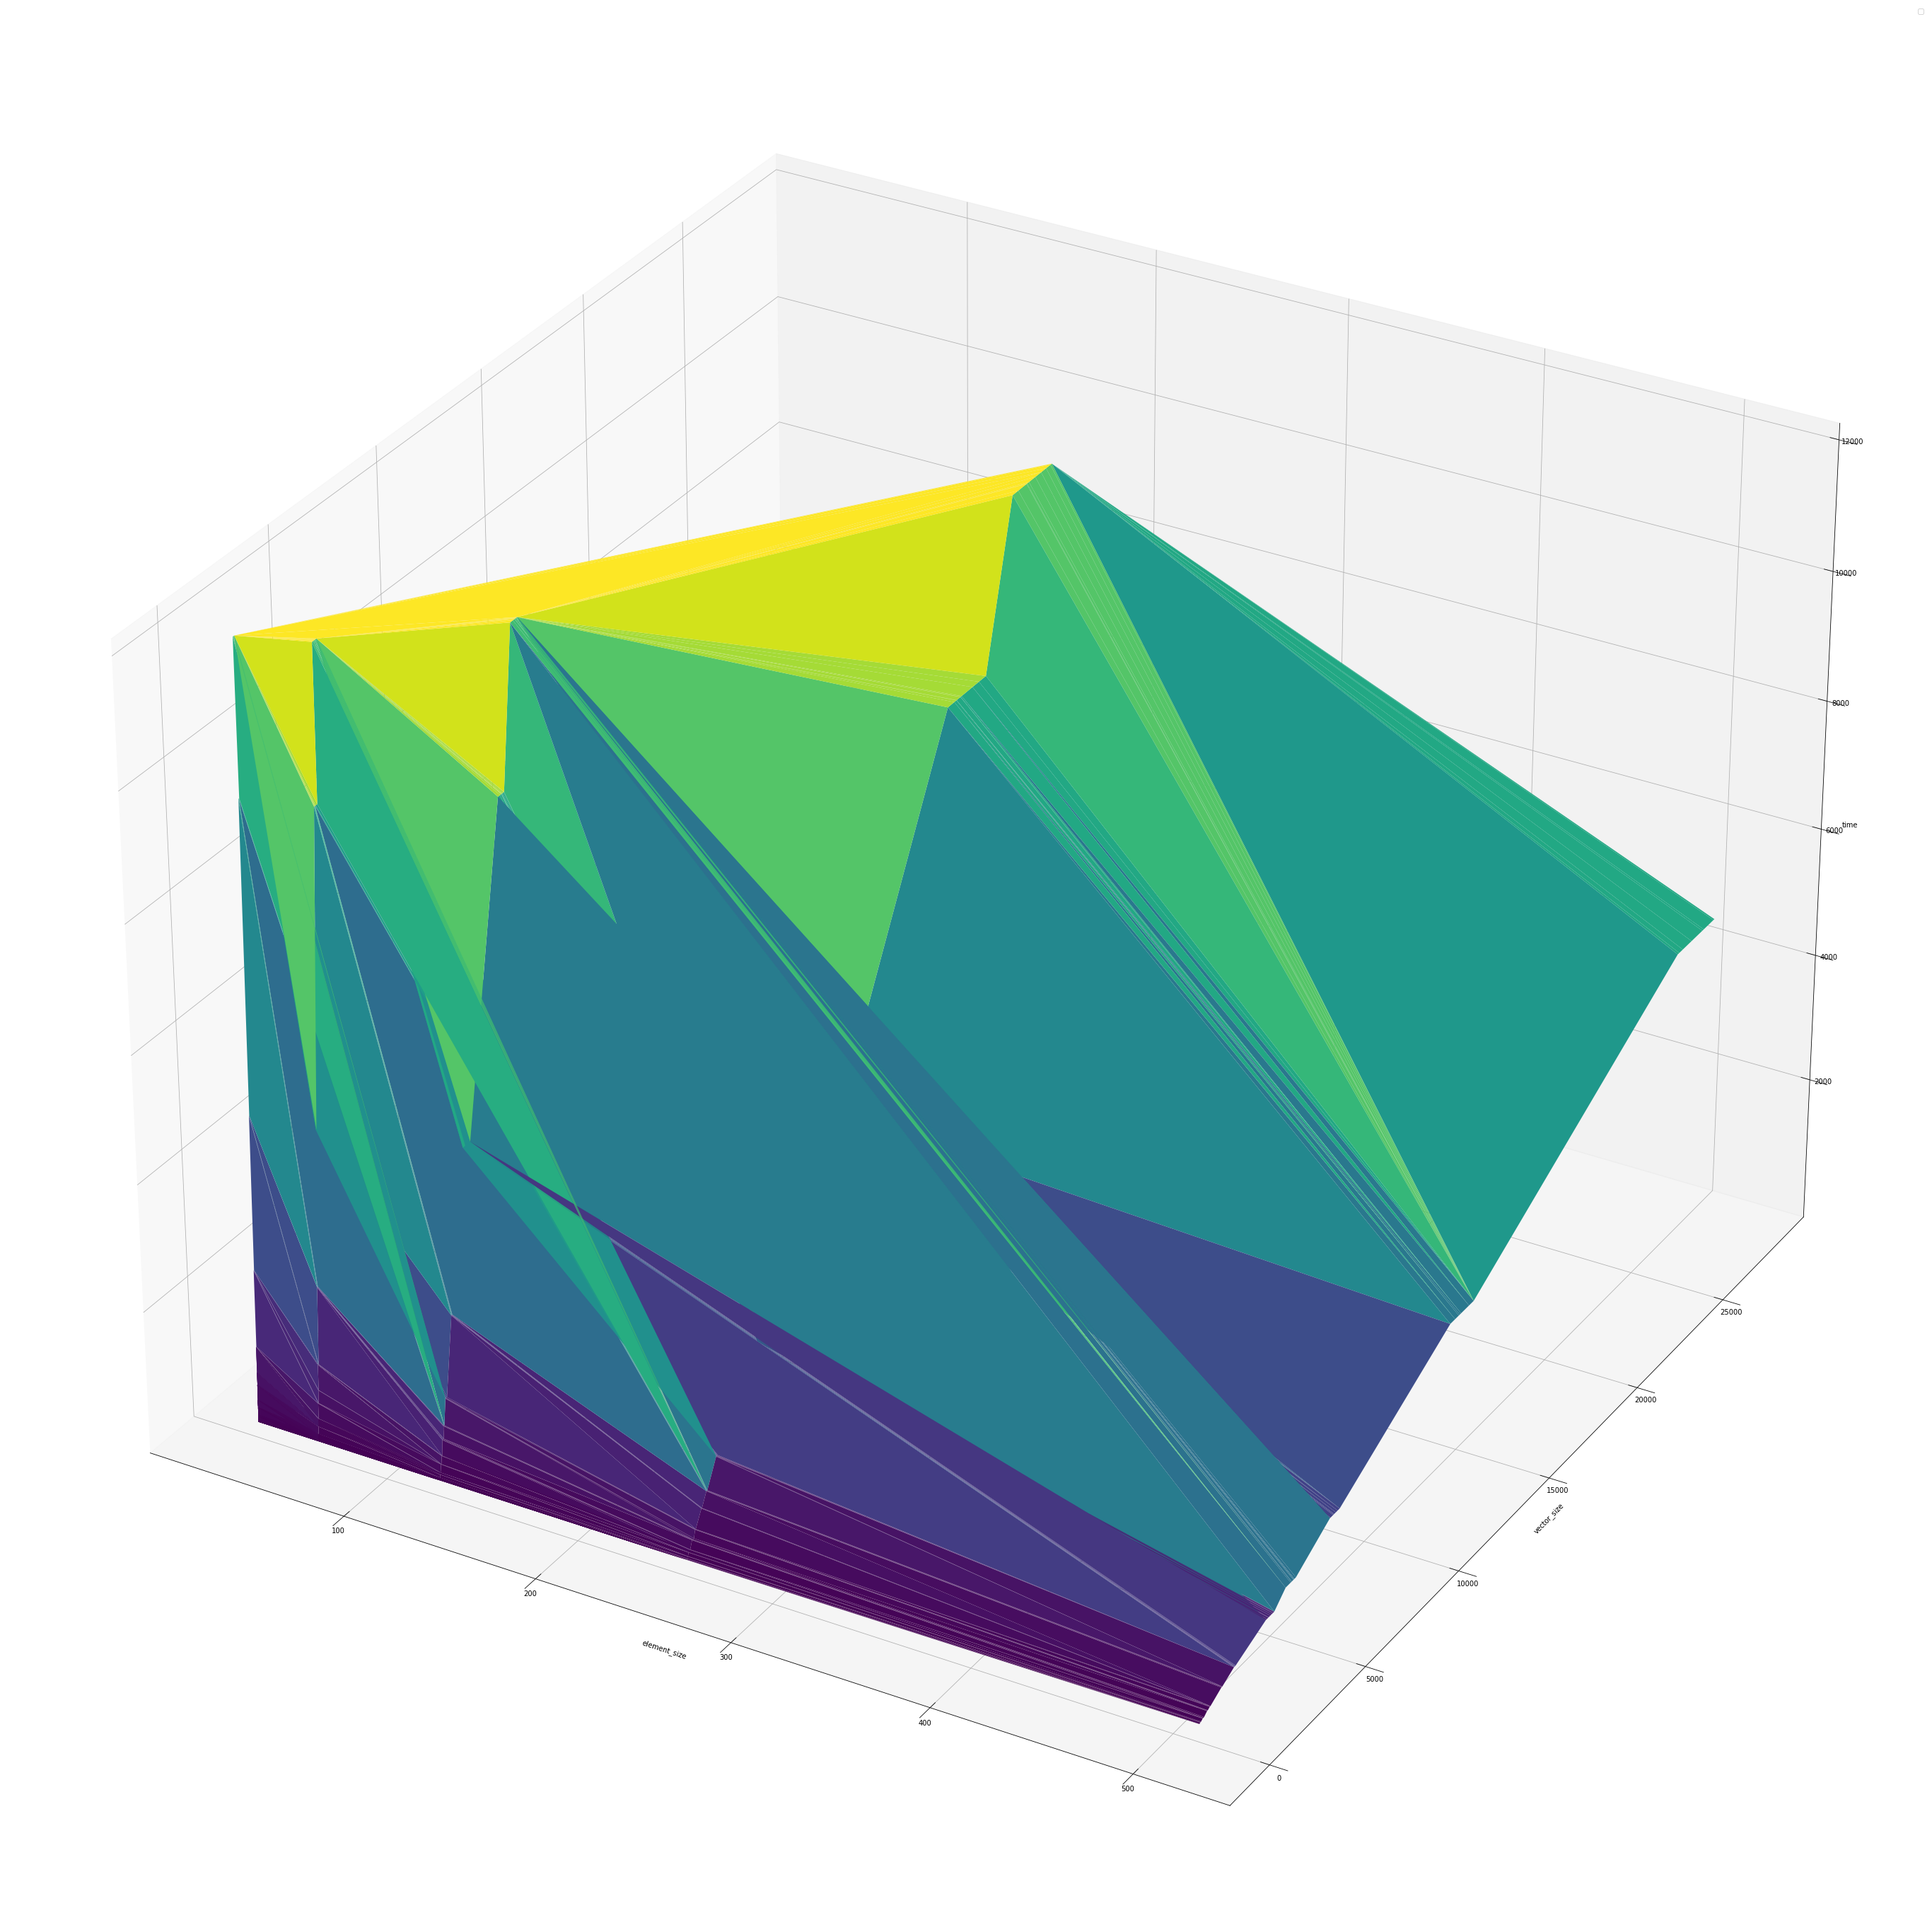

In [43]:
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(a['element_size'], a['time'],a['vector_size'], cmap=plt.cm.viridis, linewidth=0.2)
ax.set_xlabel("element_size")
ax.set_ylabel("vector_size")
ax.set_zlabel("time")
ax.legend()
plt.show()

No handles with labels found to put in legend.


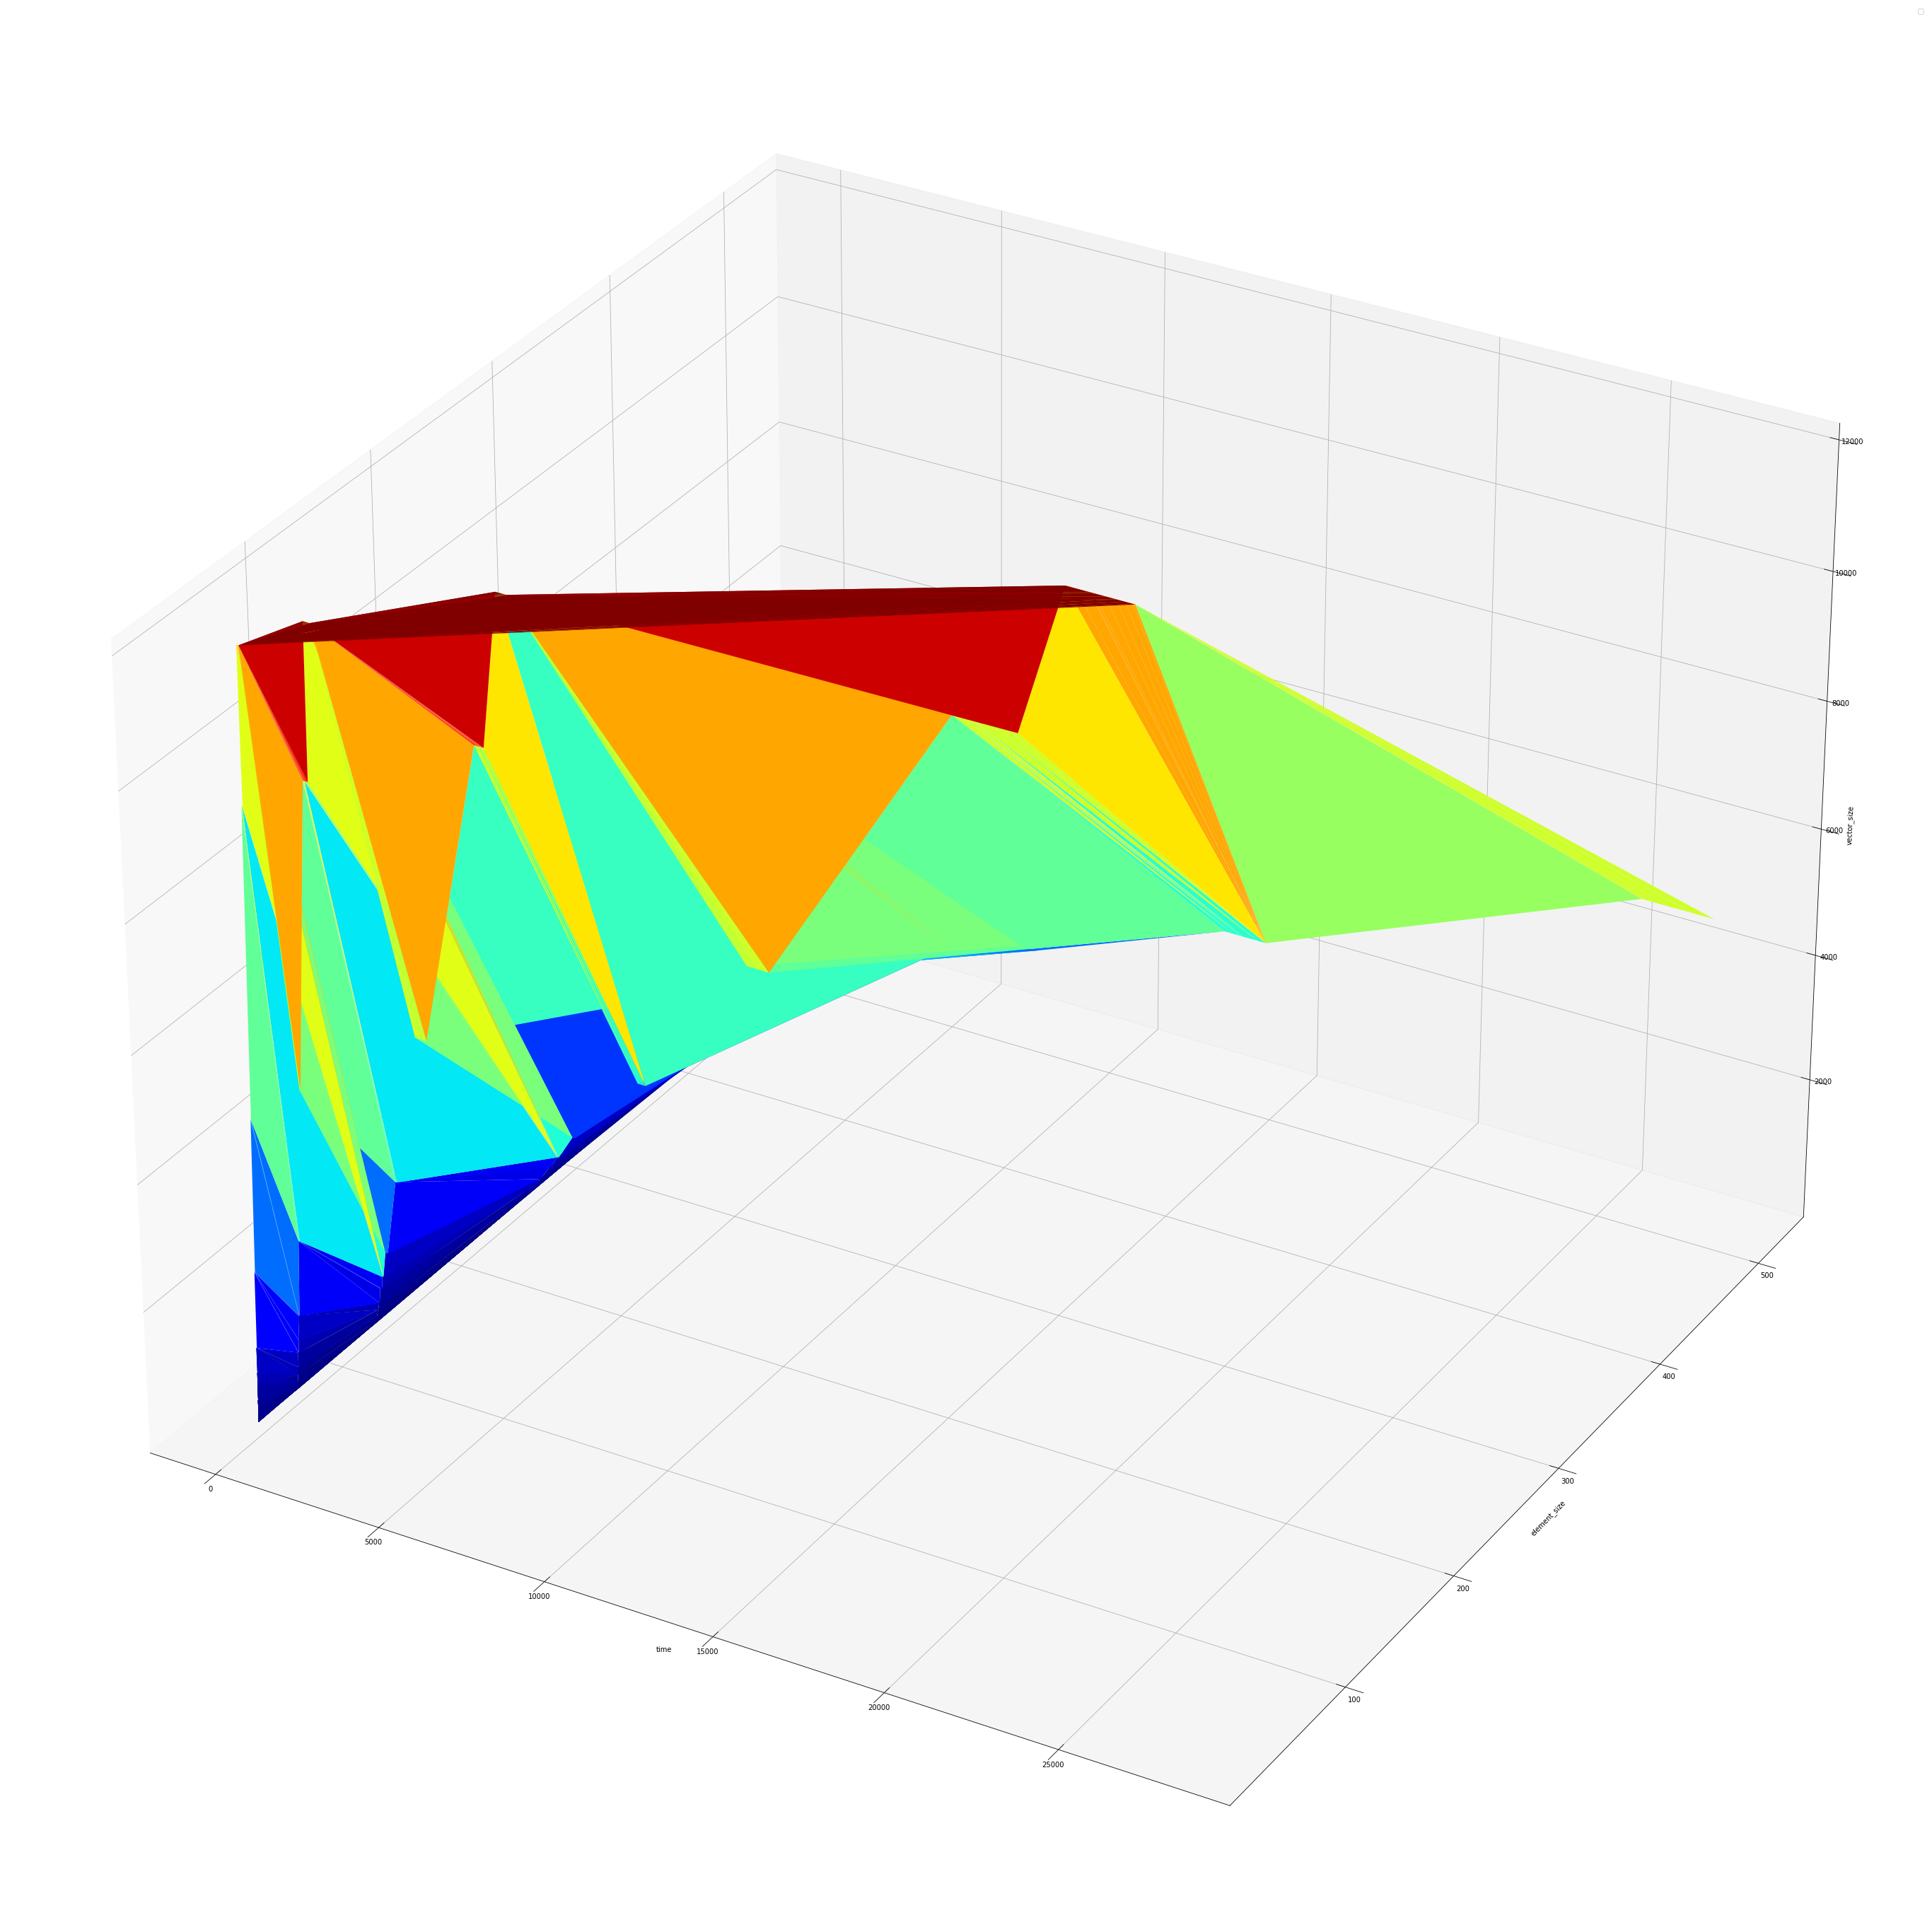

In [44]:
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(a['time'], a['element_size'],a['vector_size'], cmap=plt.cm.jet, linewidth=0.1)
ax.set_xlabel("time")
ax.set_ylabel("element_size")
ax.set_zlabel("vector_size")
ax.legend()
plt.show()

<AxesSubplot:xlabel='element_size'>

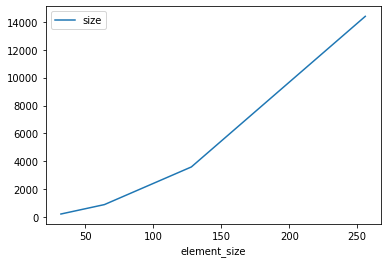

In [29]:
a[a.value.str.contains(r".*-9600-.*")].plot(x='element_size', y='size')


<AxesSubplot:xlabel='element_size'>

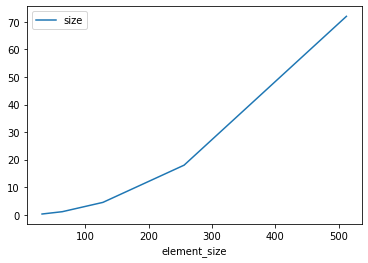

In [30]:
a[a.value.str.contains(r".*-12-.*")].plot(x='element_size', y='size')


<AxesSubplot:xlabel='vector_size'>

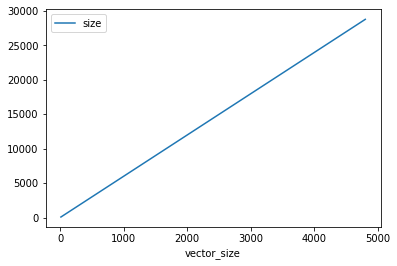

In [31]:
a[a.value.str.contains(r"^512")].plot(x='vector_size', y='size')


<AxesSubplot:xlabel='vector_size'>

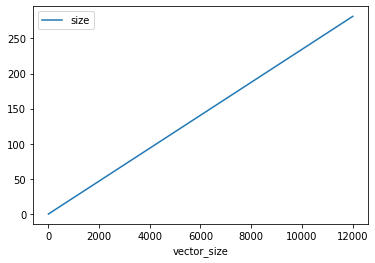

In [32]:
a[a.value.str.contains(r"^32")].plot(x='vector_size', y='size')


In [33]:
b[b.value.str.contains(r"^512-4800")]

,function,value,time,element_size,vector_size,throughput_num,throughput,size
238,tokio_seq,512-4800-48,25672.274002,512,4800,3.019899e+10,1.176327e+06,28800.0
96,tokio_seq,512-4800-84,25762.879944,512,4800,3.019899e+10,1.172190e+06,28800.0
536,tokio_seq,512-4800-60,25967.233415,512,4800,3.019899e+10,1.162965e+06,28800.0
24,tokio_seq,512-4800-6,26477.404656,512,4800,3.019899e+10,1.140557e+06,28800.0
288,tokio_seq,512-4800-36,27107.175249,512,4800,3.019899e+10,1.114059e+06,28800.0
212,tokio_seq,512-4800-72,27188.549763,512,4800,3.019899e+10,1.110725e+06,28800.0
268,tokio_seq,512-4800-24,27755.850332,512,4800,3.019899e+10,1.088022e+06,28800.0
424,tokio_seq,512-4800-12,27812.157107,512,4800,3.019899e+10,1.085820e+06,28800.0


In [34]:
import re
#n_threads = [2, 3, 6, 12, 24, 36, 48, 60, 72, 84]

#n_threads = [2, 6, 12, 24, 36, 48, 60, 72]

n_threads = [2,24,36,48]
cluster = list(map(lambda n: b[b.value.str.contains(r'-'+str(n)+'$')], n_threads))

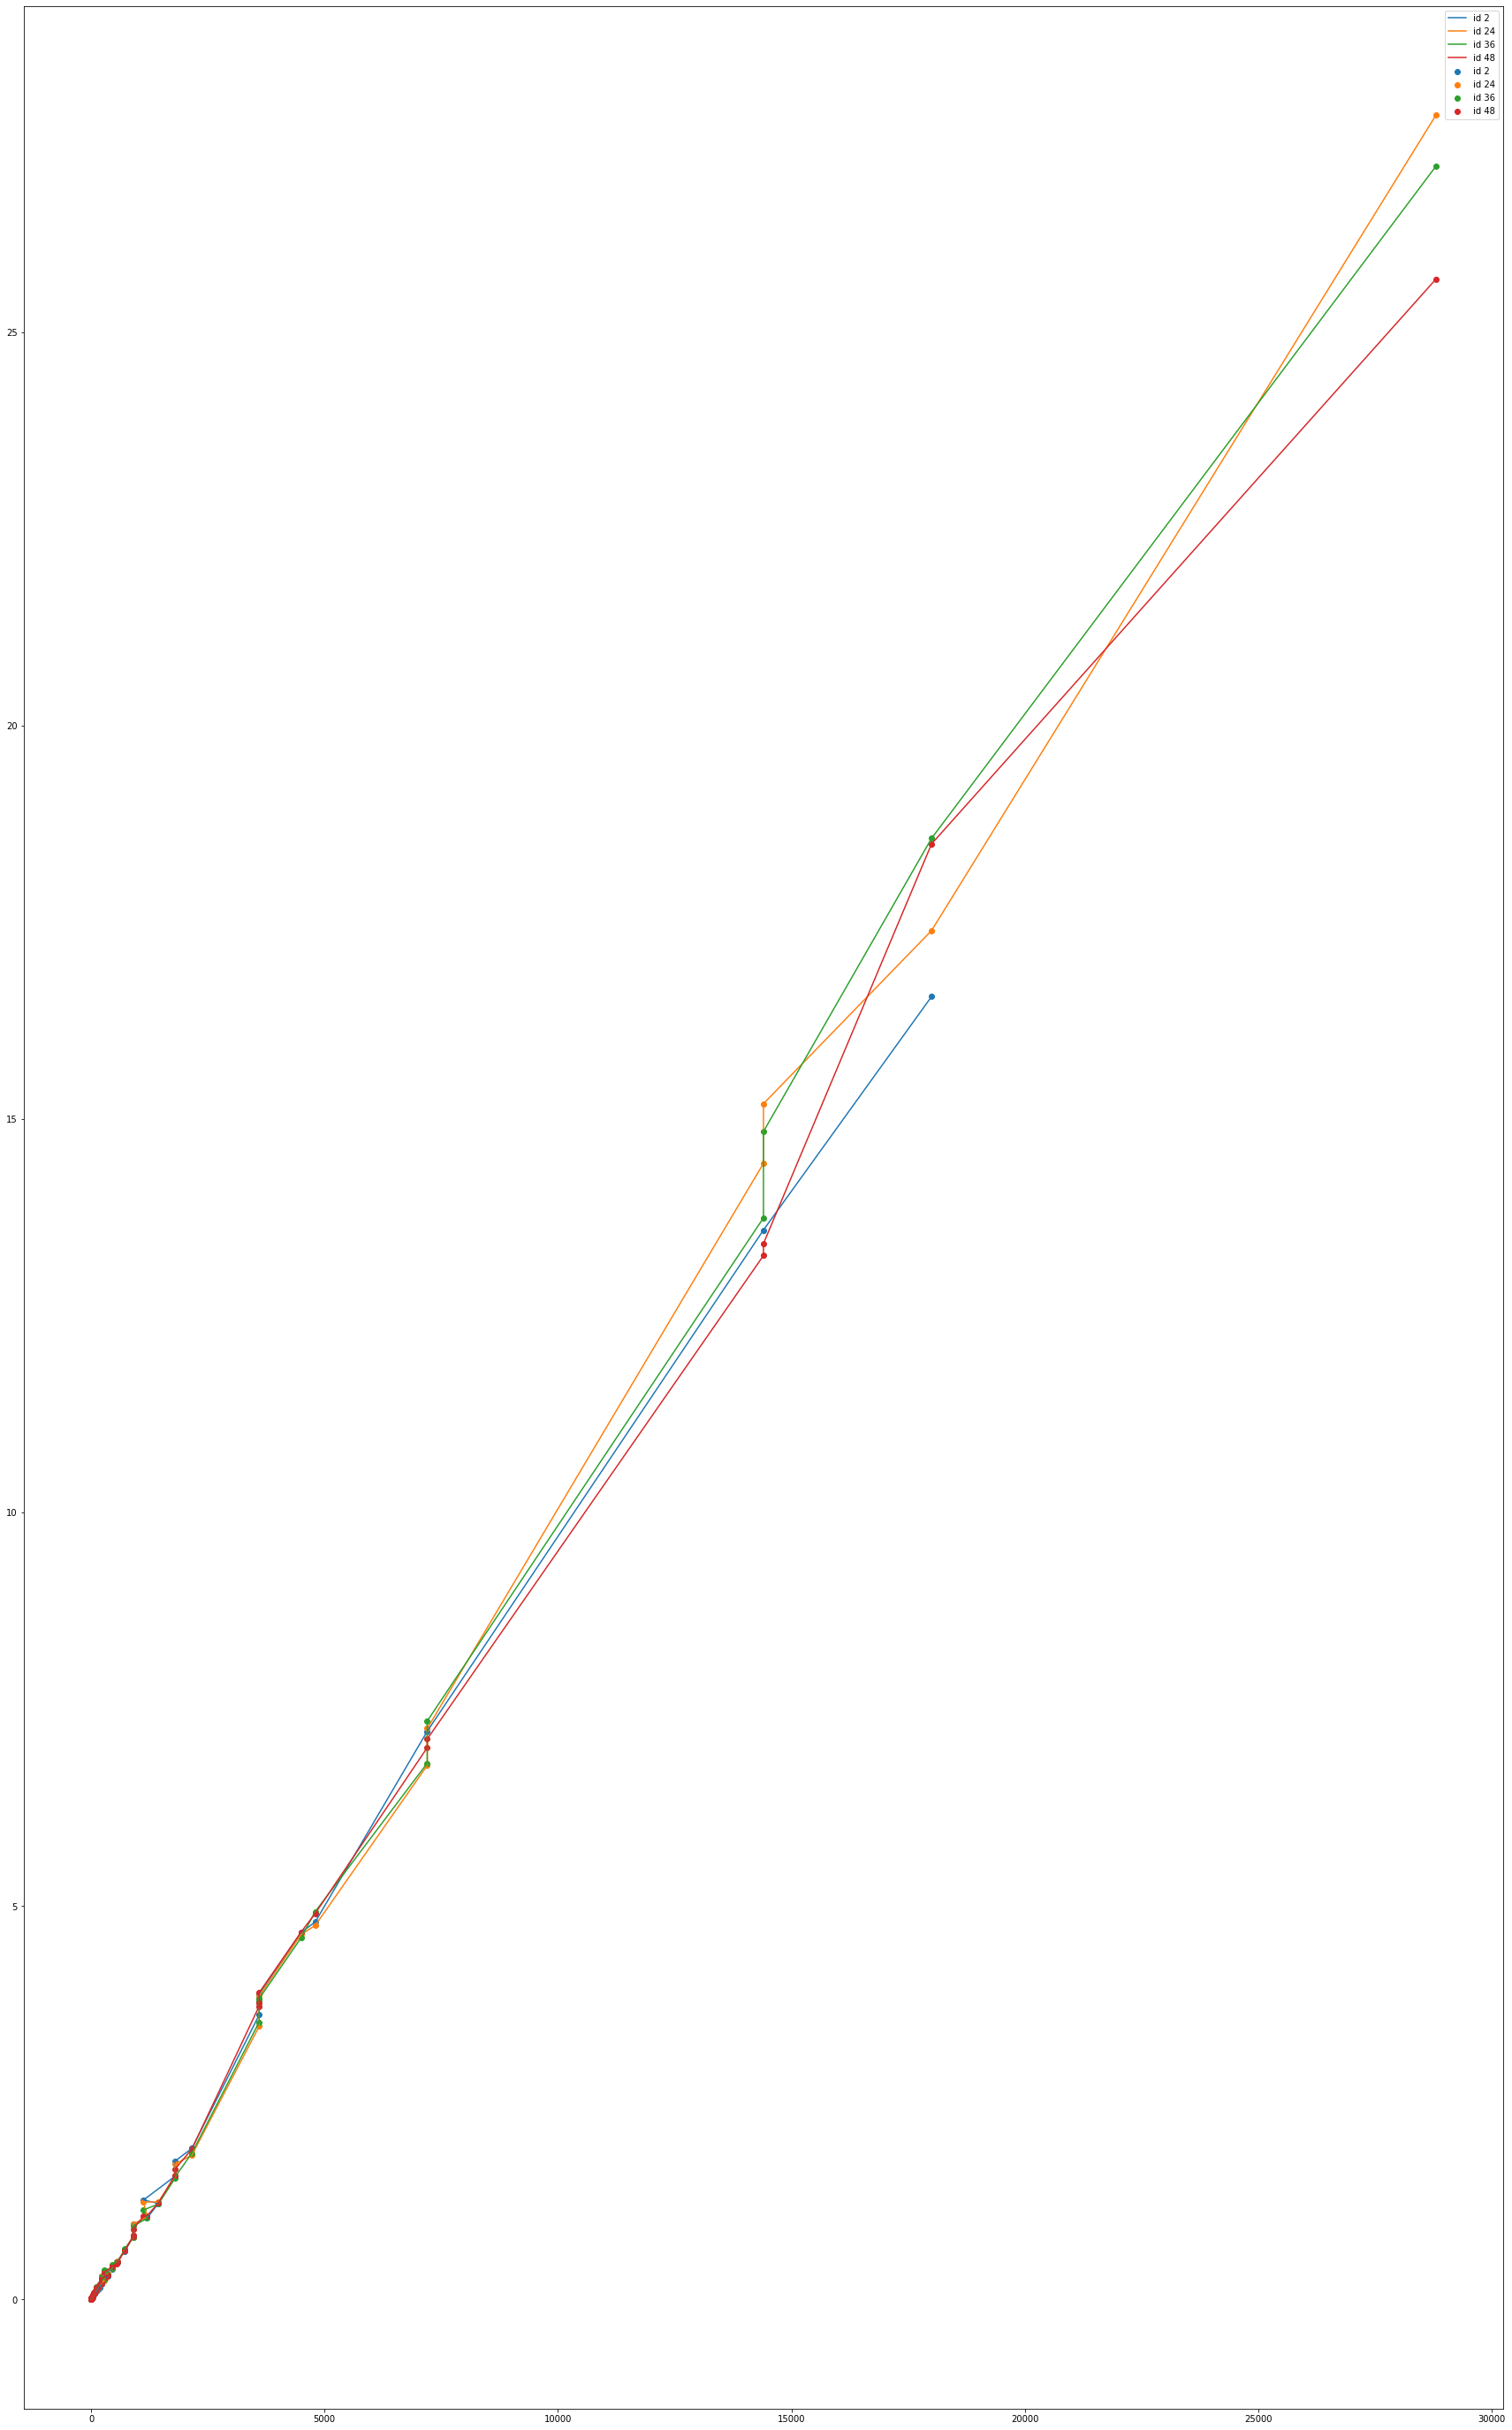

In [40]:
for i in range(len(n_threads)):
    plt.scatter(cluster[i]['size'],cluster[i]['time'] /1000,label = 'id %s'%n_threads[i])

    plt.plot(cluster[i]['size'],cluster[i]['time'] /1000,label = 'id %s'%n_threads[i])
plt.legend()
plt.rcParams["figure.figsize"] = (60,50)

#default_dpi = mpl.rcParamsDefault['figure.dpi']
#mpl.rcParams['figure.dpi'] = default_dpi*2
plt.show()
    
